# Making figures using matplotlib

`matplotlib` is a powerful python library for plotting and visualizing data. It can be used for interactive visualization, like in HyperSpy, but its main focus is making non-intearctive figures and plots.

Thus, I use `matplotlib` for making pretty much all of my publication figures.

This notebook shows how to plot both image data and spectroscopy data from HyperSpy signals, using matplotlib.

#### Requires

HyperSpy 1.3 or later

Matplotlib 2.0 or later

### Credits

- 2017/09/10 Magnus Nord. Initial version

## Making a simple image from a Signal2D

Firstly, lets make a simple image from an annular dark field (ADF) dataset of SrTiO$_3$. Lets load the file: `datasets/sto_stem_adf.hspy`

Import the plotting library, and import hyperspy

In [1]:
%matplotlib widget
import hyperspy.api as hs

Loading the data file

In [2]:
s = hs.load("datasets/sto_stem_adf.hspy")

C:\Users\emilc\AppData\Local\miniforge3\envs\TEM-intro-2024\Lib\site-packages\hyperspy\io.py:650: VisibleDeprecationWarning: Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
  warnings.warn(


Lets have a quick look at the data.

This is a scanning transmission electron microscopy - high angle annular dark field (STEM-HAADF) dataset of single crystalline SrTiO$_3$, where the electron beam has intentionally been left on several spots for increasing amounts of time. Essentially to see how the material responds to increasing amount of electron beam dose.

You can see this in the dark regions here, where the darker regions have been exposed to more electron beam dose.

To get more information about this data, you can look at the article **Assessing electron beam sensitivity for SrTiO$_3$ and La$_{0.7}$Sr$_{0.3}$MnO$_3$ using electron energy loss spectroscopy**, DOI: [10.1016/j.ultramic.2016.07.004](https://doi.org/10.1016/j.ultramic.2016.07.004). arXiv version (pdf): https://arxiv.org/pdf/1608.07814.pdf (Figure 3, page 21)

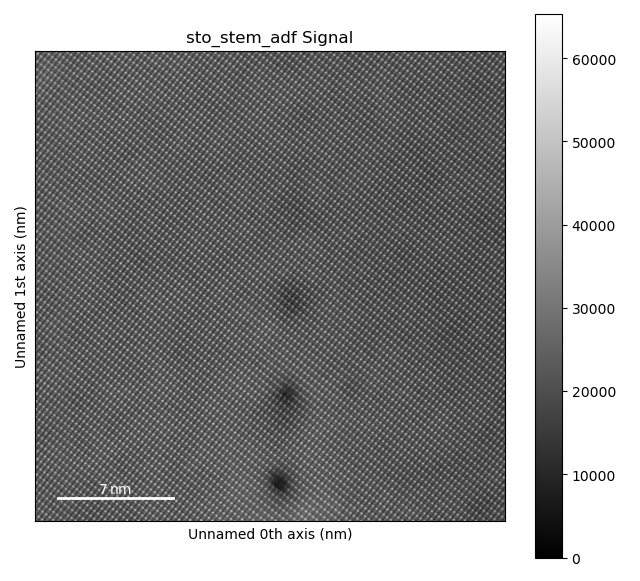

In [3]:
s.plot()

So lets make a nice jpg figure of this, using matplotlib!

### First step: a very simple figure

Importing matplotlib

In [4]:
import matplotlib.pyplot as plt

A central part of `matplotlib` is the `Figure` and `axes` (or subplot) object, which both are generated via the `plt.subplots` function.

We'll get to the properties of these two objects afterwards.

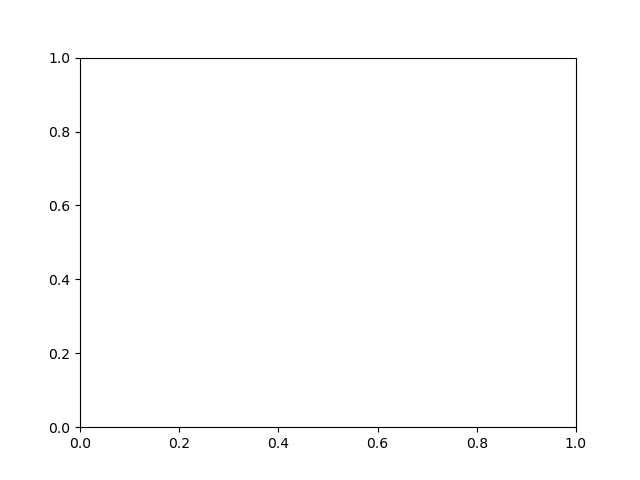

In [5]:
fig, ax = plt.subplots()

The `ax` object is where we actually plot the data, so lets start there by visualizing the data in the signal `s`. Since the STEM-ADF is image data, we use the `imshow` function in `ax`.

In [6]:
ax.imshow(s)

This will (probably) update the figure generated when running `plt.subplots`. If it doesn't try running `fig.show()`. If that doesn't work, run `fig.savefig("test_image.jpg`.

So this shows the data, but it doesn't look like a "typical" visualization of this type of data:

- No scalebar
- Wrong scaling
- Different colormap from what is (typically) used
- Lots of unnecessary space, since we really want to focus on the darker regions
- Should rotate it, so that the interesting features go from left to right
- Remove the numbers on the sides

To do this, lets make a new figure object

### A less simple figure

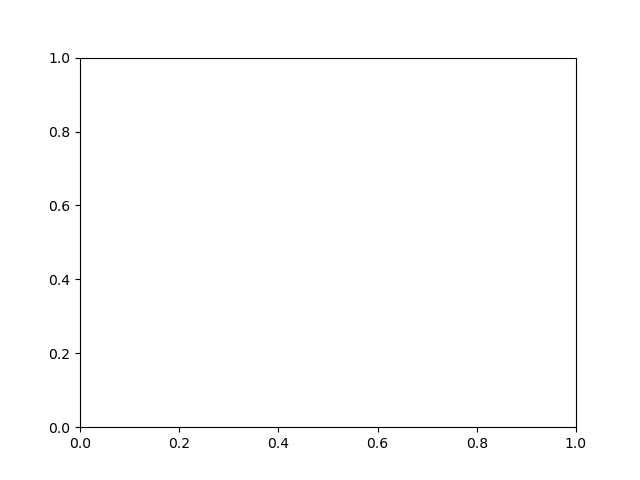

In [7]:
fig, ax = plt.subplots()

Rotate the signal itself, which we do using `swap_axes`

In [8]:
s_rot = s.swap_axes(0, 1)

This time, we set both the color map using the `cmap` parameter, and set the scale by utilizing `s.axes_manager.signal_extent`.

In [9]:
ax.imshow(s_rot, cmap="binary_r", extent=s_rot.axes_manager.signal_extent)

So now we have scaled the figure, which we can see from the numbers at the edges. But we rather want a more "classic" scalebar. For this, we use `AnchoredSizeBar`, which we need to import firstly.

In [10]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

To make it look like a "standard" scalebar, we need quite a bit of parameters

In [11]:
fontprops = fm.FontProperties(size=15)
scalebar = AnchoredSizeBar(
        transform=ax.transData, size=5, label='5 nm',
        loc=4, frameon=False,
        color='white', size_vertical=0.7,
        label_top=False,
        fontproperties=fontprops)

This makes a "artist" which needs to be added to the `ax` object via `add_artist`

In [12]:
ax.add_artist(scalebar)

Next, lets crop the image a bit, so we get the regions with the dark contrast.

In [13]:
ax.set_ylim(9, 18)

(9.0, 18.0)

Next, we disable the numbers at the edges, since we have a scalebar showing the scale.

In [14]:
ax.set_axis_off()

Since we probably want to discuss the features in the text in the article, lets add some numbers over the different dark regions.

In [15]:
ax.text(5, 15, "1", color="white", fontsize=20)

Text(5, 15, '1')

In [16]:
ax.text(10, 15, "2", color="white", fontsize=20)

Text(10, 15, '2')

In [17]:
ax.text(15, 15, "3", color="white", fontsize=20)

Text(15, 15, '3')

In [18]:
ax.text(20.5, 15, "4", color="white", fontsize=20)

Text(20.5, 15, '4')

In [19]:
ax.text(25.7, 15, "5", color="white", fontsize=20)

Text(25.7, 15, '5')

Now it is looking pretty nice! We save the figure using `fig.savefig`.

In [20]:
fig.savefig("test_figure1.jpg", dpi=200)

### More axes!

So this was a single subplot in one figure. We can also have many subplots, for visualizing more complex data. Lets plot the EEL spectra which were acquired while exposing the sample to the electron beam.

For this, we use `GridSpec` which allows for highly customized layouts.

In [21]:
fig = plt.Figure(figsize=(7.8, 5))

Then lets make the `GridSpec`, and 

In [22]:
gs = plt.GridSpec(100, 100)

In [23]:
ax = fig.add_subplot(gs[0:50, 0:100])

In [24]:
ax_eels1 = fig.add_subplot(gs[50:, 0:20])
ax_eels2 = fig.add_subplot(gs[50:, 20:40])
ax_eels3 = fig.add_subplot(gs[50:, 40:60])
ax_eels4 = fig.add_subplot(gs[50:, 60:80])
ax_eels5 = fig.add_subplot(gs[50:, 80:])

#### Plotting the same data as earlier

In [25]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
s_rot = s.swap_axes(0, 1)
ax.imshow(s_rot, cmap="binary_r", extent=s_rot.axes_manager.signal_extent)
fontprops = fm.FontProperties(size=15)
scalebar = AnchoredSizeBar(
        transform=ax.transData, size=5, label='5 nm',
        loc=4, frameon=False,
        color='white', size_vertical=0.7,
        label_top=False,
        fontproperties=fontprops)
ax.add_artist(scalebar)
ax.set_ylim(9, 18)
ax.set_axis_off()
ax.text(5, 15, "1", color="white", fontsize=20)
ax.text(10, 15, "2", color="white", fontsize=20)
ax.text(15, 15, "3", color="white", fontsize=20)
ax.text(20.5, 15, "4", color="white", fontsize=20)
ax.text(25.7, 15, "5", color="white", fontsize=20)

Text(25.7, 15, '5')

### Plotting EELS data

In [26]:
s_eels1 = hs.load("datasets/eels_data_1.hdf5", reader='hspy')
s_eels2 = hs.load("datasets/eels_data_2.hdf5", reader='hspy')
s_eels3 = hs.load("datasets/eels_data_3.hdf5", reader='hspy')
s_eels4 = hs.load("datasets/eels_data_4.hdf5", reader='hspy')
s_eels5 = hs.load("datasets/eels_data_5.hdf5", reader='hspy')

C:\Users\emilc\AppData\Local\miniforge3\envs\TEM-intro-2024\Lib\site-packages\hyperspy\io.py:650: VisibleDeprecationWarning: Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
  warnings.warn(


Now, we need to use the `plot` function instead of `imshow`, since it is 1 dimensional data.

To get the "x-axis" data, we use the `s.axes_manager[0].axis`

In [27]:
ax_eels1.plot(s_eels1.axes_manager[0].axis, s_eels1)
ax_eels2.plot(s_eels2.axes_manager[0].axis, s_eels2)
ax_eels3.plot(s_eels3.axes_manager[0].axis, s_eels3)
ax_eels4.plot(s_eels4.axes_manager[0].axis, s_eels4)
ax_eels5.plot(s_eels5.axes_manager[0].axis, s_eels5)

Disable the y-axis numbers, to make the plot a bit less busy

In [28]:
ax_eels1.set_yticks([])
ax_eels2.set_yticks([])
ax_eels3.set_yticks([])
ax_eels4.set_yticks([])
ax_eels5.set_yticks([])

[]

Then set arbitratry units for the y-axis

In [29]:
ax_eels1.set_ylabel("Electron counts, [au]")

Text(0, 0.5, 'Electron counts, [au]')

And electron energy loss for the x-label

In [30]:
ax_eels1.set_xlabel("Electron energy loss, [eV]")

Text(0.5, 0, 'Electron energy loss, [eV]')

Lastly, labeling for the plots themselves. Where we use the `transform` parameter to set the coordinate system for the text. This make it much easier to add these types of labels. Since the default coordinate system is the scaled data.

In [31]:
ax_eels1.text(0.1, 0.85, "1", fontsize=20, transform=ax_eels1.transAxes)
ax_eels2.text(0.1, 0.85, "2", fontsize=20, transform=ax_eels2.transAxes)
ax_eels3.text(0.1, 0.85, "3", fontsize=20, transform=ax_eels3.transAxes)
ax_eels4.text(0.1, 0.85, "4", fontsize=20, transform=ax_eels4.transAxes)
ax_eels5.text(0.1, 0.85, "5", fontsize=20, transform=ax_eels5.transAxes)

Text(0.1, 0.85, '5')

In [32]:
fig.savefig("multiple_axes.jpg", dpi=200)

## Some more examples of matplotlib images

* https://en.wikipedia.org/wiki/Quantum_dot#/media/File:Gaas_inas_quantum_dot.jpg
* https://en.wikipedia.org/wiki/Perovskite_(structure)#/media/File:Perovskite_oxide_thin_film.jpg with overlay of atomic structure using [Atomic Simulation Environment](https://wiki.fysik.dtu.dk/ase/ase/visualize/visualize.html#matplotlib) (ASE)
* https://en.wikipedia.org/wiki/Scanning_transmission_electron_microscopy#/media/File:Scanning_transmission_electron_microscopy_srtio3_compare_adf_abf.jpg
* https://en.wikipedia.org/wiki/Scanning_transmission_electron_microscopy#/media/File:Stem_dpc_schematic_magnetic_explanation.jpg
* https://en.wikipedia.org/wiki/Scanning_transmission_electron_microscopy#/media/File:Ferromagnetic_domains_in_spiral_pattern_for_Fe60Al40.jpg
* https://en.wikipedia.org/wiki/Electron_energy_loss_spectroscopy#/media/File:Electron_energy_loss_spectrum_feature_overview.svg
* https://en.wikipedia.org/wiki/Electron_energy_loss_spectroscopy#/media/File:Electron_energy_loss_spectroscopy_coreloss_lsmo.svg